## Fully connected Neural Network

En el ejercicio siguiente se va a realizar un modelo de clasificación para el dataset MNIST. Para ello, vamos a diseñar una red neuronal sencilla usando el framework KERAS. La red que vamos a diseñar realizará lo siguiente:

- Vamos a "aplastar" la matriz de entrada de 28x28 a [1,784]
- Una capa sencilla de 512 pesos con la función de activación RELU
- Añadimos un Dropout de 0.2
- Una capa sencilla de salida con los 10 números posibles

Como ya sabemos, los datos son imágenes de 28x28 píxeles y existen 10 números a clasificar, del 0 al 9. Puesto que el valor de los píxeles está en escala de grises del 0 al 255, normalizamos de 0 a 1.


In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt


(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train.shape

(60000, 28, 28)

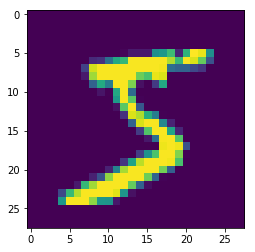

In [10]:
plt.imshow(x_train[0])

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0219 - acc: 0.9926
Epoch 2/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0186 - acc: 0.9937
Epoch 3/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0186 - acc: 0.9939
Epoch 4/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0175 - acc: 0.9942
Epoch 5/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0156 - acc: 0.9943


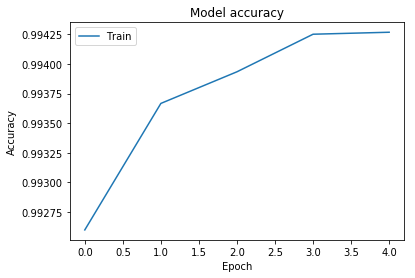

In [20]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


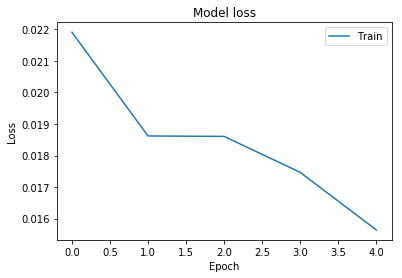

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0662 - acc: 0.9796


[0.06624503410587786, 0.9796]